# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

3. Why is the Gini a good loss function for categorical target variables?

4. Why do trees tend to overfit, and how can this tendency be constrained?

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?



1. Trees are constructed by recursively splitting the data into smaller subsets based on the values of input features. At each step, the algorithm chooses the feature and split point that best separates the data according to a certain criterion, like minimizing impurity in classification or reducing variance in regression. This process continues until a stopping rule is met, such as a minimum number of observations in a node or no further improvement from splitting.

2. Trees can naturally handle non-linear relationships because they don't assume any specific functional form between the inputs and the output. Each split divides the data based on threshold values, allowing the tree to create step-like functions that approximate complex patterns. In contrast, linear models try to fit a straight line (or hyperplane) through the data, which limits their ability to model non-linear patterns unless extra transformations or interaction terms are added.

3. The Gini index is a good loss function for categorical target variables because it measures the impurity or disorder within a node. A lower Gini value means the node is more "pure" (i.e., mostly one class), which is what we want when splitting the data. It's also computationally efficient and tends to work well in practice by helping the algorithm find splits that clearly separate different classes.

4. Trees tend to overfit because they can keep splitting the data to perfectly fit the training set, even if those splits capture noise instead of real patterns. This leads to very complex trees that don't generalize well to new data. To prevent this, we can limit the depth of the tree, set a minimum number of samples per leaf, or use pruning techniques that remove branches that don't provide much benefit according to a cost-complexity tradeoff.

5. False. While decision trees can handle categorical variables well, they also work with numerical features and mixed types. The key strength of trees is their flexibility in handling different types of data and interactions between variables, not just categorical ones. In fact, trees can sometimes struggle when there are too many categorical levels, as it becomes harder to find meaningful splits.

6. Most versions of classification and regression trees only allow for binary splits because they simplify the tree structure and make the decision-making process more interpretable. Binary splits are also easier to handle computationally and help reduce the risk of overfitting by making the tree grow in a more controlled way, instead of having too many branches at once.

7. A few heuristic ways to check if a tree is overfitting or underfitting include looking at the training and test accuracy. If the training accuracy is very high but the test accuracy is low, the tree is likely overfitting. You can also examine the tree size: a very deep or complex tree is more likely to overfit. On the other hand, a very shallow tree with low accuracy on both training and test sets might be underfitting. Cross-validation can also help evaluate the tree’s performance more reliably.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

In [2]:
#question 2 part 1
import pandas as pd
import numpy as np
import seaborn as sns

url = "https://raw.githubusercontent.com/ds4e/trees/refs/heads/main/assignment/data/cars_hw.csv"
df = pd.read_csv(url,low_memory=False)
# Check number of observations and features
print("Shape of dataset:", df.shape)

# Display the names of the columns (variables)
print("Available variables:", df.columns.tolist())

# Show the first few rows of the data
df.head()


Shape of dataset: (976, 12)
Available variables: ['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Price']


,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [5]:
# question 2 part 2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Update column name
categorical_vars = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
numeric_vars = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']
X = df[categorical_vars + numeric_vars]
y = df['Price']

# Updated OneHotEncoder with correct parameter
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_vars)],
    remainder='passthrough'
)

# Apply encoding
X_encoded = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)



In [6]:
# question 2 part 3
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Try different values for min_samples_leaf and store R^2 scores
r2_scores = {}

for i in range(1, 26):
    tree = DecisionTreeRegressor(min_samples_leaf=i, random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    r2_scores[i] = r2_score(y_test, y_pred)

# Find the best min_samples_leaf based on highest R^2
best_leaf = max(r2_scores, key=r2_scores.get)
print("Best min_samples_leaf:", best_leaf)
print("Best R^2 score:", r2_scores[best_leaf])


Best min_samples_leaf: 5
Best R^2 score: 0.8253410511223336


Question 2 part 3:

To determine the best value for the min_samples_leaf parameter in the decision tree, I trained multiple models using different values ranging from 1 to 25. For each model, I evaluated the performance on the test data using the R² score. The highest R² was achieved when min_samples_leaf was set to 5, resulting in an R² score of approximately 0.825. This means the decision tree model with that setting explained about 82.5% of the variance in car prices on the test data, which suggests a good fit without overfitting.

R^2 on test set: 0.8253410511223336
RMSE on test set: 141536.54096868183


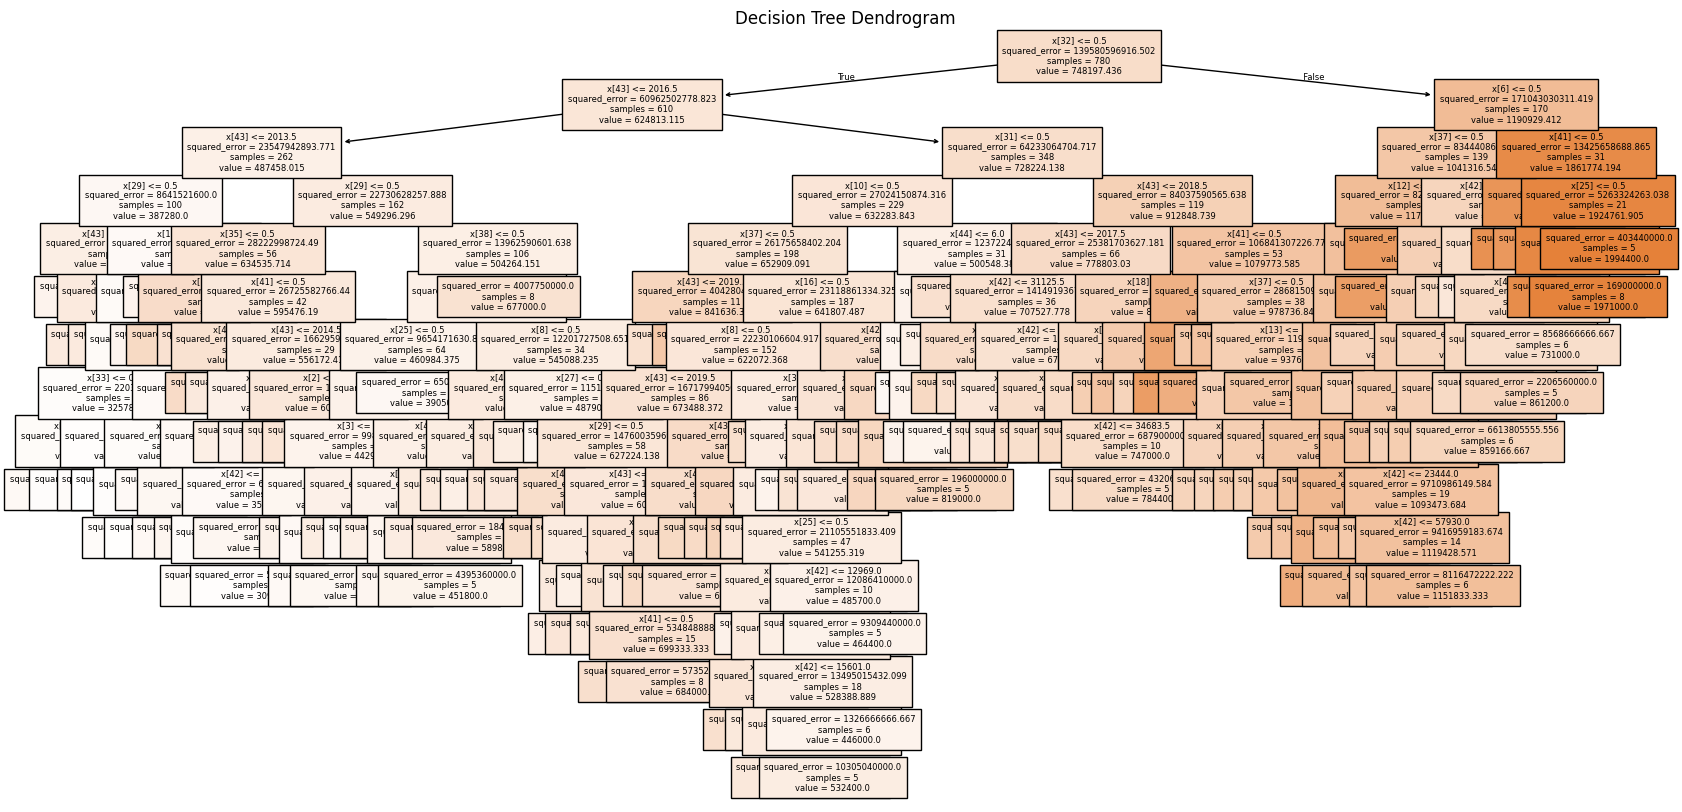

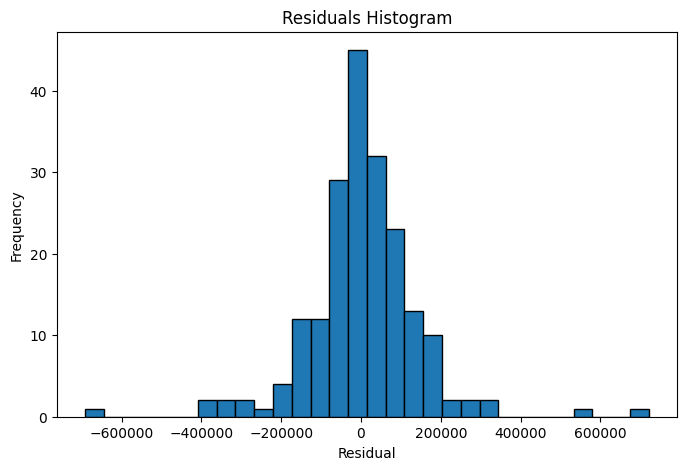

Mean of residuals: 5605.531260123096
Skewness of residuals: 0.07698229066248492


In [8]:
# question 2 part 4
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Train the best decision tree model
best_tree = DecisionTreeRegressor(min_samples_leaf=5, random_state=42)
best_tree.fit(X_train, y_train)

# Predict on test set
y_pred = best_tree.predict(X_test)

# Compute evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R^2 on test set:", r2)
print("RMSE on test set:", rmse)

# Plot the decision tree (dendrogram)
plt.figure(figsize=(20, 10))
plot_tree(best_tree, filled=True, fontsize=6)
plt.title("Decision Tree Dendrogram")
plt.show()

# Compute residuals
residuals = y_test - y_pred

# Plot residuals histogram
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title("Residuals Histogram")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

# Optional: Print residuals stats
print("Mean of residuals:", np.mean(residuals))
print("Skewness of residuals:", residuals.skew())


In [9]:
# question 2 part 5
from sklearn.linear_model import LinearRegression

# Fit linear regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predict and evaluate on test set
y_pred_lr = linreg.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("Linear Regression R^2:", r2_lr)
print("Linear Regression RMSE:", rmse_lr)


Linear Regression R^2: 0.8202733305994354
Linear Regression RMSE: 143575.19660568467


Question 2 part 5:

I ran a linear regression using the same features as in the decision tree model. Compared to the tree, the linear model had a slightly lower R² and higher RMSE on the test set, meaning it explained less variance and had larger prediction errors. This suggests that the regression tree performed better, likely because it can handle non-linear relationships and interactions between variables, which the linear model cannot capture as easily.

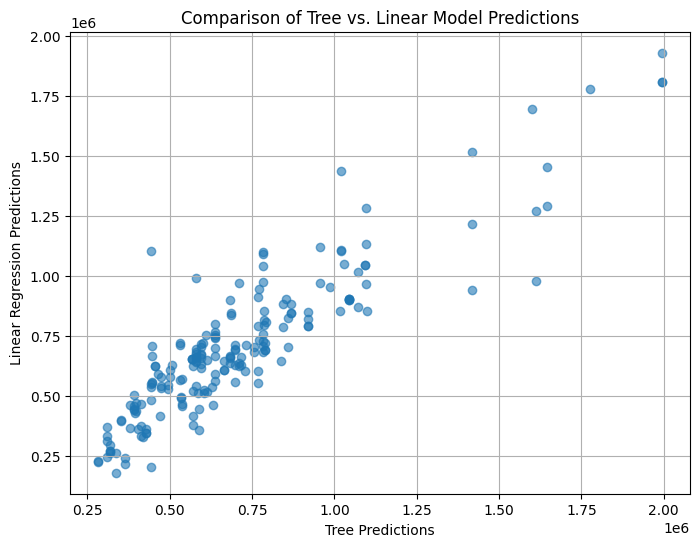

In [10]:
# question 2 part 6
import matplotlib.pyplot as plt

# Predict prices using both models
tree_preds = best_tree.predict(X_test)
linreg_preds = linreg.predict(X_test)

# Scatter plot of predicted values
plt.figure(figsize=(8, 6))
plt.scatter(tree_preds, linreg_preds, alpha=0.6)
plt.xlabel("Tree Predictions")
plt.ylabel("Linear Regression Predictions")
plt.title("Comparison of Tree vs. Linear Model Predictions")
plt.grid(True)
plt.show()


Question 2 part 6:

The scatter plot compares predicted car prices from the decision tree model (x-axis) and the linear regression model (y-axis). Overall, the points follow a fairly diagonal trend, which shows that the two models generally agree. However, there are several noticeable deviations, especially at higher price ranges, where the linear model sometimes predicts significantly higher or lower values than the tree. This suggests that the decision tree may be capturing certain non-linear patterns or splits that the linear model misses, particularly for more expensive cars. The spread also shows that while both models perform reasonably well, they behave differently in specific regions of the feature space.

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?

A decision tree works by splitting the data into different groups based on the values of the input variables. Each final group, or "leaf," has its own predicted value, usually just the average of the responses in that group. If we create a separate dummy variable for each group—where the dummy is 1 if a data point falls in that group and 0 otherwise—then we can use these dummies as inputs in a linear regression model. The regression just assigns a different constant value to each dummy, which is exactly what the tree does for each group. So in that sense, a decision tree can be seen as a kind of linear regression on these dummy variables.

But the reverse doesn’t hold. A regular linear regression finds relationships between the input features and the output using weighted sums, which can represent patterns that trees might miss unless you make the tree very deep. So while every tree can be turned into a linear regression using dummy variables, not every linear regression can be fully captured by a decision tree.